# 流程控制、迭代與遞迴
### 葉永傑
**February 3，2023**

---


In [1]:
import numpy as np                # 處理數據
import datetime
import pandas as pd               # 資料處理套件
import math

# if、switch

if、switch 根據所給的條件執行，其中
- if 只接受 True 或 False (但實際上輸入不是 0 或 False 的都會被 if 看成 TRUE) 
- switch 則可設定依不同的文字或數值做出反應 


+ 在 3.10 版本前，Python 並沒有實現 switch 語句在其他編程語言中所做的功能，只能利用 if - elif 或是 dict 模擬
+ 在 3.10 版本以後，Python 重大變化：出現 match-case，與 switch-case 的結構相似

語法 :
```python 
    if (資料) :
        print(程式敘述句)
    elif (資料) :
        print(程式敘述句) 
    else :
        print(程式敘述句)
```
match-case 語法 :
```python
    match 選擇變數 :
        case 選項 1 :
             輸出 1
        case 選項 2 :
             輸出 2
        case 選項 3 : 
             輸出 3
        case _ :
             輸出 n
```

if 的幾種形式：
+ 程式敘述句只有一行可不縮排

In [2]:
A = datetime.datetime.strptime('2021-01-05 11:30:20', '%Y-%m-%d %H:%M:%S')
if (datetime.datetime.today() > A): print(datetime.datetime.today())

2023-02-22 13:57:23.773229


+ 標準形式

In [3]:
if (datetime.datetime.today() > A):
    print(datetime.datetime.today())
    print(A)

2023-02-22 13:57:23.789216
2021-01-05 11:30:20


+ 條件不成立也需處理

In [4]:
if (datetime.datetime.today() > A):
    print(datetime.datetime.today())
    print(A)
else:
    print("It is too long ago!")

2023-02-22 13:57:23.804678
2021-01-05 11:30:20


**match-case 的標準形式**

語法 :
```python
    match 選擇變數 :
        case 選項 1 :
             輸出 1
        case 選項 2 :
             輸出 2
        case 選項 3 : 
             輸出 3
        case _ :
             輸出 n
```

+ [[Python] 3.10 先覽版本開始支援 switch 功能（透過 match 語法）](https://clay-atlas.com/blog/2021/04/03/python-cn-310-switch-statement-match/)
+ [Python 重大變化：是 match-case，不是 switch-case](https://www.readfog.com/a/1630488642582581248)

例如 :

```python
def center(x, type):
    match type:
        case 'median':
            print(np.median(x))           
        case 'mean':
            print(np.mean(x))
        case _ :                       # 當其他 case 都無法匹配時，匹配這條
            print('error')
```

+ 利用 if - elif 模擬

+ 也可搭配函數當作判斷式

In [5]:
def center(x, type):
    if type == 'median':
        return(np.median(x))
    elif type == 'mean':
        return(np.mean(x))
    else:
        return('error')

center(range(1,11), "median")

5.5

+ 利用 dict 模擬

In [6]:
x = range(1,101)
center = {'median': np.median(x),'mean': np.mean(x)}
center.get("median")

50.5

In [7]:
switch = {"1":"ok", 2:"try again", "3":"fail"}
switch.get(2)

'try again'

+ 對應資料跟 if 一樣只能判斷長度 1 的向量

In [8]:
x = '3'
switch.get(x)

'fail'

# for

語法 :
```python
for 參數 in 數列 :
    程序(程式碼)
```
for 執行的次數取決於你的數列長度，而參數則對應是要執行數列中哪一次的任務

**函數近似(泰勒展開)**

近似函數 $e^5$

$e^x ≈ 1+x+\frac{x^2}{2!}+⋯+\frac{x^n}{n!}$

In [9]:
def expon(x):
    output = 1
    for i in range(1,21):
        output = output + x**i/pd.Series(range(1,i+1)).prod()
    return output

expon(5) - np.exp(5)

-1.2035194799864257e-05

**牛頓勘根**

公式 : $x_{n+1} = x_n − \frac{f(x_n)}{f′(x_n)}$

例如，解 $x^2 + 9x + 8 = 0$

$f(x) = x^2 + 9x + 8$

$f′(x) = 2x + 9$

In [10]:
sol = 0.5

for i in range(1,21):
    sol = sol - (sol**2 + 9*sol + 8)/(2*sol + 9)

sol

-1.0

**計算 iris 各類別的變異數矩陣**

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
name = iris.target_names
n = len(name)
var_class = list()

for i in range(n):
    var_class.append(np.cov(np.transpose((iris.data[iris.target == i]))))

var_class

[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
        [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
        [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
        [0.01033061, 0.00929796, 0.00606939, 0.01110612]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]

# while

語法 : 
```python
while 可以執行條件 :
    程式碼
```

查看前面的泰勒展開式需要幾次才能使誤差小於 $10^{−10}$

In [13]:
def exp_test(x):
    output = 1
    acc = 1
    i = 0
    while acc > 1e-10:
        i = i + 1
        output = output + x**i/math.perm(i)
        acc = abs(output - np.exp(x))
    return i

exp_test(5)

28

**break 可以隨時跳出迴圈(之後的迴圈都不做)**

In [14]:
for i in range(1,11):
    if i%2 == 0 : break 
    else: print(i) 

1


**pass 不做任何事情，所有的程式都將繼續**

In [15]:
for i in range(1,11):
    if i%2 == 0 : 
        pass
        print(i+10)
    else: print(i) 

1
12
3
14
5
16
7
18
9
20


**continue 是停止執行下方的程式碼，跳到迴圈的開頭，再繼續執行迴圈**

它包含了兩個動作：
1. 遇到 continue 就停住，不執行其後的程式碼
2. 跳回到迴圈的開頭，再繼續執行程式碼

In [16]:
for i in range(1,11):
    if i%2 == 0 : 
        continue
        print(i+10)
    else: print(i) 

1
3
5
7
9


# apply family
apply 是一種類似於解決早期版本 for 速度不如其他語言迴圈的問題，但在近期的版本已經跟 apply 速度已經相差無幾了

最常用的 :
1. apply(基本)
2. applymap 在 python 中相當於 lapply 在 R 中
3. map 在 python 中相當於 sapply 在 R 中
4. pivot_table() / pivot() 在 python 中相當於 tapply(table) 在 R 中
+ [Pandas教程 | 数据处理三板斧——map、apply、applymap详解](https://zhuanlan.zhihu.com/p/100064394)

較困難的 :
+ [mapply package](https://mapply.readthedocs.io/en/stable/_code_reference/mapply.html)

這邊就只說明常用的四種

### apply
語法 :
```python
資料.apply(函數, axis=參數)
```
+ note : 參數 1 是行(row)，0 是列(col) 
+ [pandas.DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)
+ [pandas apply](https://pythonviz.com/pandas/3-ways-to-use-pandas-apply-in-python/)


**每行平均**

In [17]:
test = np.transpose(np.array([range(1,101)]).reshape(10,10))
test = pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9
0,1,11,21,31,41,51,61,71,81,91
1,2,12,22,32,42,52,62,72,82,92
2,3,13,23,33,43,53,63,73,83,93
3,4,14,24,34,44,54,64,74,84,94
4,5,15,25,35,45,55,65,75,85,95
5,6,16,26,36,46,56,66,76,86,96
6,7,17,27,37,47,57,67,77,87,97
7,8,18,28,38,48,58,68,78,88,98
8,9,19,29,39,49,59,69,79,89,99
9,10,20,30,40,50,60,70,80,90,100


In [18]:
test.apply(np.mean,axis=1)

0    46.0
1    47.0
2    48.0
3    49.0
4    50.0
5    51.0
6    52.0
7    53.0
8    54.0
9    55.0
dtype: float64

### applymap 在 python 中相當於 lapply 在 R 中
語法 :
```python
df.applymap(lambda x: 要做的事)
```
+ 資料型態需為 dataframe

In [19]:
df = pd.DataFrame(range(5,11))
df

,0
0,5
1,6
2,7
3,8
4,9
5,10


In [20]:
df1 = df.applymap(lambda x: np.round(np.random.uniform(size=x),1))
df1

,0
0,"[0.6, 0.1, 0.1, 0.5, 0.6]"
1,"[0.5, 0.1, 0.6, 0.0, 0.6, 0.7]"
2,"[0.9, 1.0, 0.4, 0.1, 0.1, 0.3, 0.0]"
3,"[0.3, 0.4, 0.4, 0.1, 0.9, 0.6, 0.2, 0.0]"
4,"[0.0, 0.3, 0.7, 0.6, 0.4, 0.5, 1.0, 0.1, 0.7]"
5,"[0.8, 0.4, 0.4, 0.2, 0.8, 0.6, 0.0, 0.4, 0.5, ..."


### map 在 python 中相當於 sapply 在 R 中
語法 :
```python
Series.map()
```
+ 資料型態需為 Series 

In [21]:
df2 = pd.Series(range(1,6))
df2

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [22]:
def fun(x):
    return(x,x-1)

df2.map(fun)

0    (1, 0)
1    (2, 1)
2    (3, 2)
3    (4, 3)
4    (5, 4)
dtype: object

In [23]:
pd.DataFrame(df2).applymap(lambda x: df1.loc[x].map(np.var))

,0
0,"0 0.071389 Name: 1, dtype: float64"
1,"0 0.137143 Name: 2, dtype: float64"
2,"0 0.072344 Name: 3, dtype: float64"
3,"0 0.088395 Name: 4, dtype: float64"
4,"0 0.0561 Name: 5, dtype: float64"


### .pivot_table() / .pivot() 在 python 中相當於 tapply(table) 在 R 中
+ index：不重塑的欄位
+ columns：指定欄位的值將成為轉換後的寬資料欄位名稱
+ values：要重塑的欄位

+ pivot_table() 是 pivot() 的通用版本。使用 pivot() 時有額外的限制：原始長資料內，要重複的幾個欄位、不可以有重複的值

In [24]:
d = {"家庭收入" : (100,70,50,69,56,130,200,110,320,44,67,69,55,48),
     "學齡" : (4,2,3,4,5,8,7,5,6,8,6,4,3,3),
     "程度" : ("高","低","中","高","高","中","高","中","高","低","中","中","高","低")}

test2 = pd.DataFrame(d)
test2

,家庭收入,學齡,程度
0,100,4,高
1,70,2,低
2,50,3,中
3,69,4,高
4,56,5,高
5,130,8,中
6,200,7,高
7,110,5,中
8,320,6,高
9,44,8,低


In [25]:
test2.pivot_table(index='學齡', columns='程度', values='家庭收入')

程度,中,低,高
學齡,,,
2,NaN,70.0,NaN
3,50.0,48.0,55.0
4,69.0,NaN,84.5
5,110.0,NaN,56.0
6,67.0,NaN,320.0
7,NaN,NaN,200.0
8,130.0,44.0,NaN


**可再搭配 .groupby() / .aggregate() 做後續操作，split - apply - combine 為資料集中常見的操作，可回去參考 : 5_資料整理基礎**

## 更多操作
+ [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
+ [有沒有類似 Purrr (R) 的庫？](https://www.reddit.com/r/datascience/comments/6w3s0g/is_there_any_library_similar_to_purrr_r/)
+ [Map, Filter and Reduce](https://book.pythontips.com/en/latest/map_filter.html)

### python 的接班者 : [Coconut](http://coconut-lang.org/)

# 平行計算
+ 並行 Concurrency — multithreading：即在同一個 process 開多個 Thread
+ 平行 Parallelism — multiprocessing：直接多開 process


+ 一個 process 裡面可以含有多個 thread
+ 這些底下的 thread 之間可以共享資源、一起合作將該建立好的 process 功能完成


+ [[Python] 並行與平行 — 影分身之術！](https://medium.com/%E7%A8%8B%E5%BC%8F%E4%B9%BE%E8%B2%A8/python-%E4%B8%A6%E8%A1%8C%E8%88%87%E5%B9%B3%E8%A1%8C-%E5%BD%B1%E5%88%86%E8%BA%AB%E4%B9%8B%E8%A1%93-2b8238916297)


In [26]:
import time

def sleep_5():
    for i in range(0, 5):
        print(i)
        time.sleep(1)
    return

def sleep_10():
    for i in range(0, 10):
        print(i)
        time.sleep(1)
    return

start_time = time.time()
sleep_5()
sleep_10()
end_time = time.time()

print('It costs '+str(end_time - start_time)+' s')

0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
It costs 15.156838417053223 s


## 第一種平行方法 : 平行 parallelism
+ 就是 multiprocessing，現在把兩個迴圈分配給兩個 process 來同時進行


```
使用 Multi-Processing 進行平行運算前，需要確認 :

由於不同的 Process 間無法共享資料，所以如果平行運算的過程中需要互相取用資料，就不適合透過 Multi-Process 的方式執行。 
```

In [27]:
import time
import multiprocessing as mp

def sleep_5():
    for i in range(0, 5):
        print(i)
        time.sleep(1)
    return

def sleep_10():
    for i in range(0, 10):
        print(i)
        time.sleep(1)
    return

start_time = time.time()  

p1 = mp.Process(target=sleep_5)   # 建立一個名字為 p1 的 Process，執行任務
p2 = mp.Process(target=sleep_10)

p1.start()                        # 啟動 p1 任務
p2.start()

p1.join()                         # 等待 p1 任務結束 (一定會等到結束才執行下一行)
p2.join()

end_time = time.time()

print('It costs '+str(end_time - start_time)+' s')

It costs 0.12230062484741211 s


+ **把上面程式存成 mp.py**

In [28]:
file = open(r"C:\Users\user\mp.py", mode='r')
data = file.read()
print(data)
file.close()

# -*- coding: big5 -*-

import time
import multiprocessing as mp

def sleep_5():
    for i in range(0, 5):
        print(i)
        time.sleep(1)
    return

def sleep_10():
    for i in range(0, 10):
        print(i)
        time.sleep(1)
    return


start_time = time.time()  

if __name__ == '__main__':
  # run tasks sequentially
  p1 = mp.Process(target=sleep_5)   
  p2 = mp.Process(target=sleep_10)
  
  p1.start()                        
  p2.start()
  
  p1.join()                         
  p2.join()
 
end_time = time.time()

print('It costs '+str(end_time - start_time)+' s')


+ **放到 python 的啟動目錄下，然後在命令列打 python "mp.py"**

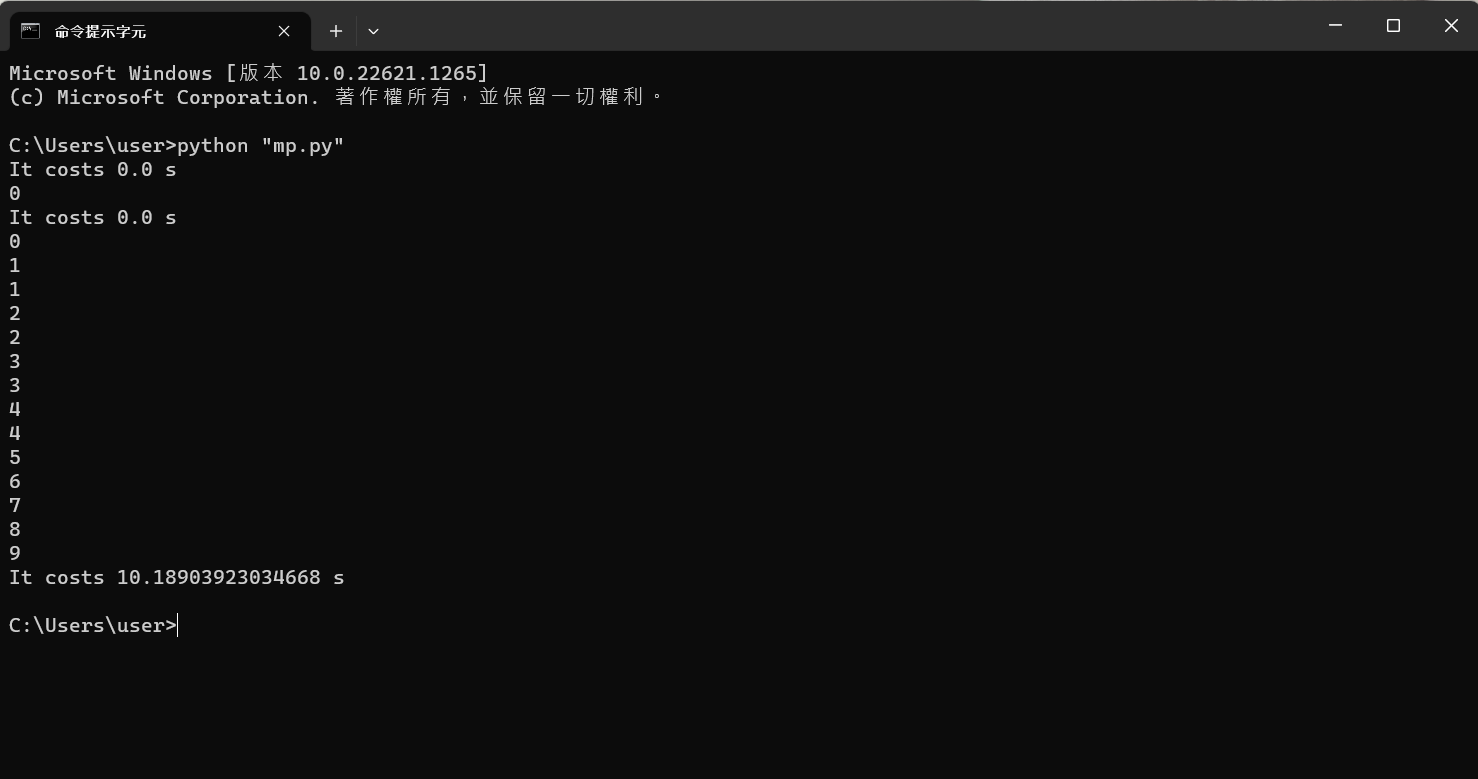

+ **mp 在 windows 下的用法比較特殊，似乎不能用 python 的直譯器**

## 第二種平行方法 : 並行 Concurrency
+ 就是 multithreading，這時我要把兩個迴圈分配給兩個 thread 同時進行

In [29]:
import os
import threading

def sleep_5():
    for i in range(0, 5):
        print(i)
        time.sleep(1)
    return

def sleep_10():
    for i in range(0, 10):
        print(i)
        time.sleep(1)
    return
  
start_time = time.time()

thread_1 = threading.Thread(target=sleep_5)   # 例項化一個執行緒物件，使執行緒執行這個函式
thread_2 = threading.Thread(target=sleep_10)  # 例項化一個執行緒物件，使執行緒執行這個函式

thread_1.start()  # 啟動這個執行緒
thread_2.start()  # 啟動這個執行緒

thread_1.join()   # 等待 thread_1 結束，如果不打 join 程式會直接往下執行
thread_2.join()   # 等待 thread_2 結束，如果不打 join 程式會直接往下執行

end_time = time.time()

print('It costs '+str(end_time - start_time)+' s')

0
0
1
1
22

33

4
4
5
6
7
8
9
It costs 10.081093072891235 s


+ [Python 平行化運算 - Multi-Processing](https://www.minglunwu.com/notes/2020/20200520.html)

+ [平行化你的 Python 程式](https://minghsu.io/posts/python-parallel/)

# 遞迴

遞迴與迭代的差異：
+ [疊代與遞迴
(Iteration & Recursion)](http://simonsays-tw.com/web/Recursion/Iteration&Recursion.html)

河內塔解法原理：
+ [河內塔](https://openhome.cc/zh-tw/algorithm/basics/hanoi-tower/)

河內塔的 python 程式範例：
+ [河內塔](https://openhome.cc/zh-tw/algorithm/basics/hanoi-tower/)

---